CS23MTECH11024 - Arif Khan Pathan

In [96]:
import numpy as np
import matplotlib.pyplot as plt

**Q1**

In [97]:


def generate_data(num_points, gamma):
    """
    Generates a linearly separable 2D dataset with two clusters.

    Args:
        num_points (int): Number of data points.
        gamma (float): Margin between the clusters.

    Returns:
        tuple: A tuple containing the features (X) and labels (y).
    """

    # Generate random points for each cluster
    X1 = np.random.rand(int(num_points / 2), 2)
    X2 = np.random.rand(int(num_points / 2), 2) + gamma

    # Add class labels
    y1 = np.ones(int(num_points / 2))
    y2 = -np.ones(int(num_points / 2))

    # Combine data from both clusters
    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))

    # Shuffle the data
    indices = np.random.permutation(num_points)
    X = X[indices]
    y = y[indices]

    return X, y

In [98]:
def perceptron_learning(X, y, learning_rate=0.1, max_iterations=1000):
   """Perform the Perceptron algorithm to learn a linear classifier from data X and labels y."""

    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    
    for _ in range(max_iterations):
        for i in range(len(X)):
            # Calculate prediction
            y_pred = np.sign(np.dot(w, X[i]) + b)

            # Update weights if prediction is incorrect
            if y_pred != y[i]:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]

    return w, b


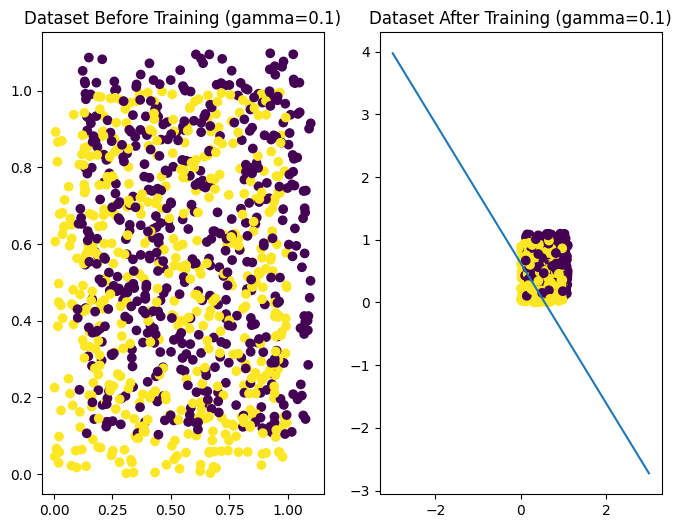

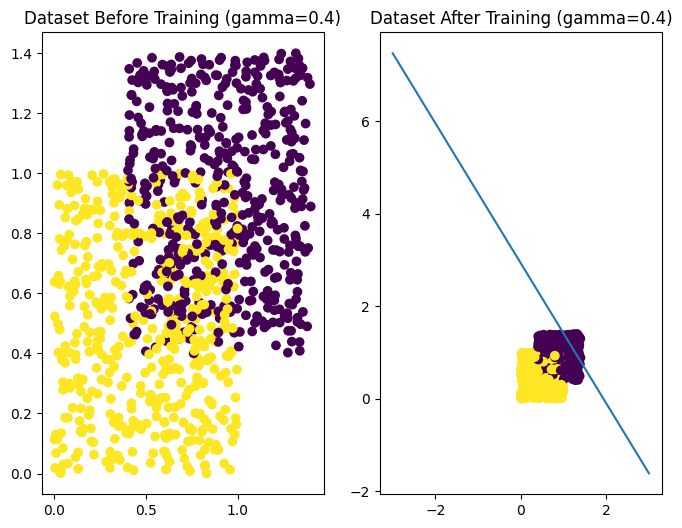

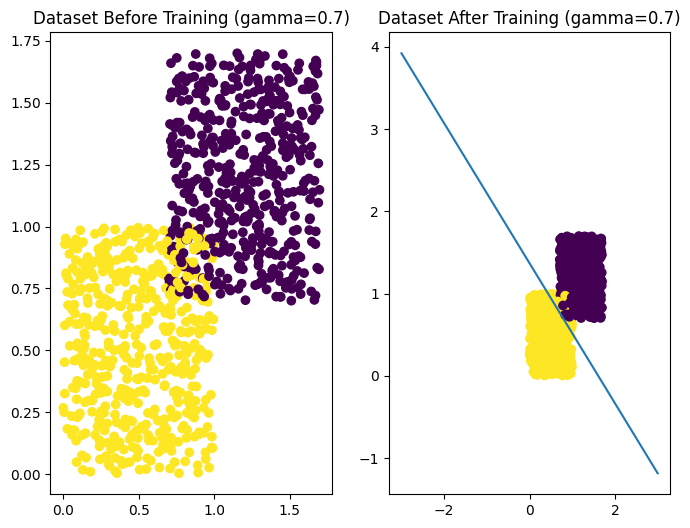

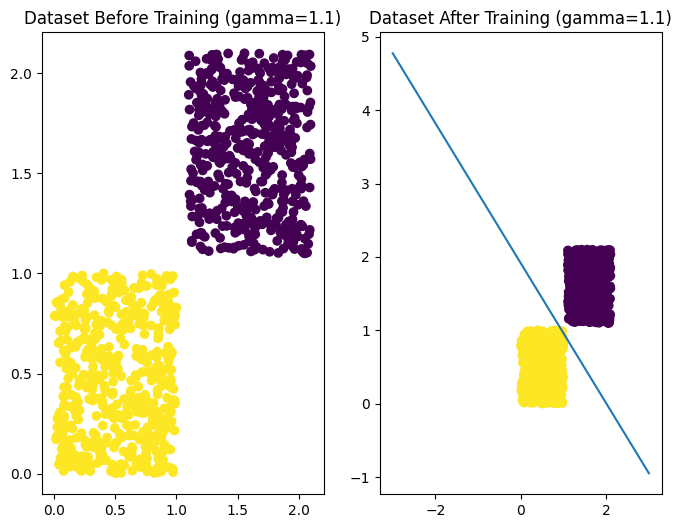

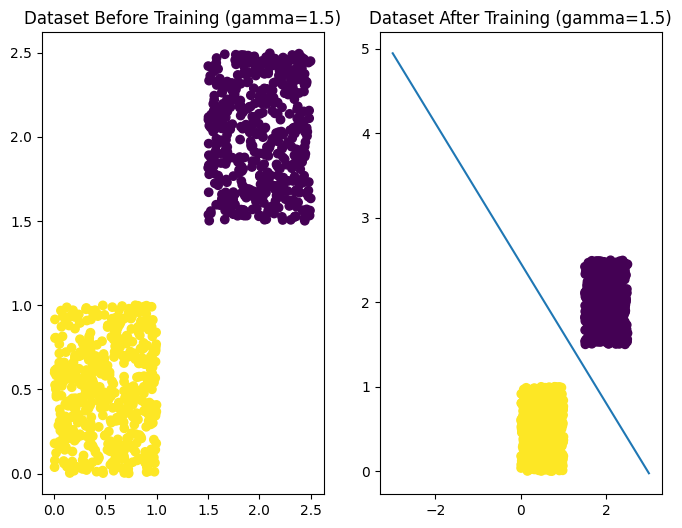

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

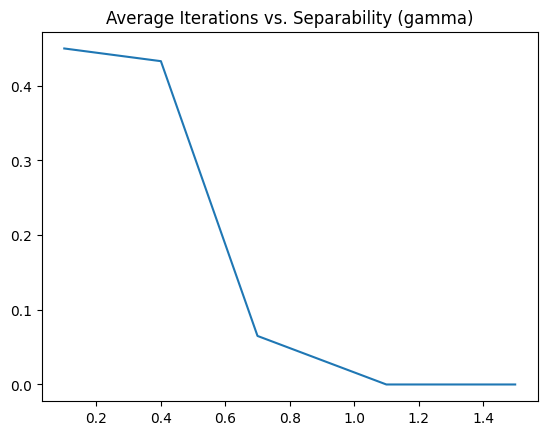

In [99]:

def plot_boundary(w, b):
    # Calculate line parameters
    m = -w[1] / w[0]
    c = -b / w[0]

    # Plot the line
    x_values = np.linspace(-3, 3, 100)
    y_values = m * x_values + c
    plt.plot(x_values, y_values, label="Decision Boundary")

# Experiment with different gamma values
gamma_values = [0.1, 0.4, 0.7, 1.1, 1.5]
average_iterations = []

for gamma in gamma_values:
    # Generate data
    X, y = generate_data(1000, gamma)

    # Train perceptron
    w, b = perceptron_learning(X, y)

    # Calculate number of iterations
    iterations = np.sum(y != np.sign(np.dot(X, w) + b))

    # Record average iterations
    average_iterations.append(iterations / len(X))

    # Plot the dataset before and after training
    plt.figure(figsize=(8, 6))

    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Dataset Before Training (gamma={})".format(gamma))

    plt.subplot(122)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plot_boundary(w, b)
    plt.title("Dataset After Training (gamma={})".format(gamma))
    plt.show()

# Plot average iterations vs. gamma
plt.plot(gamma_values, average_iterations)
plt.title("Average Iterations vs. Separability (gamma)")
plt.xlabel


**Q2**

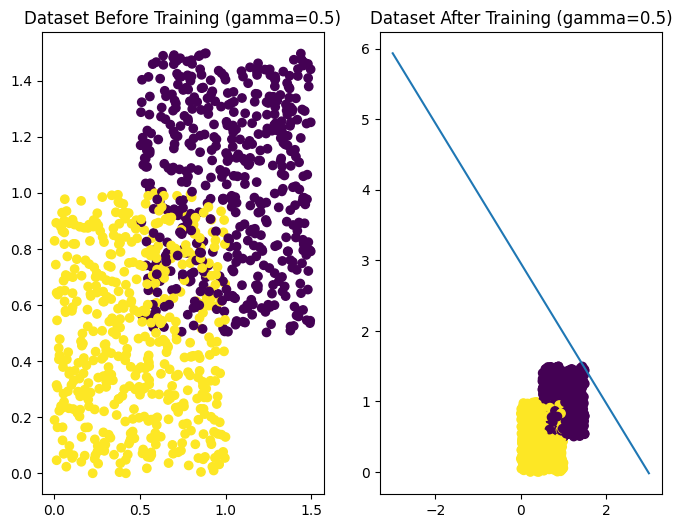

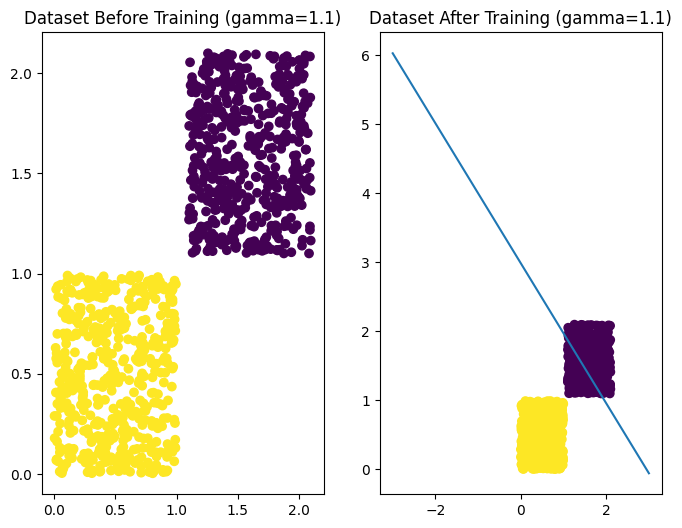

C:\Users\Arif\AppData\Local\Temp\ipykernel_3272\3187036320.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


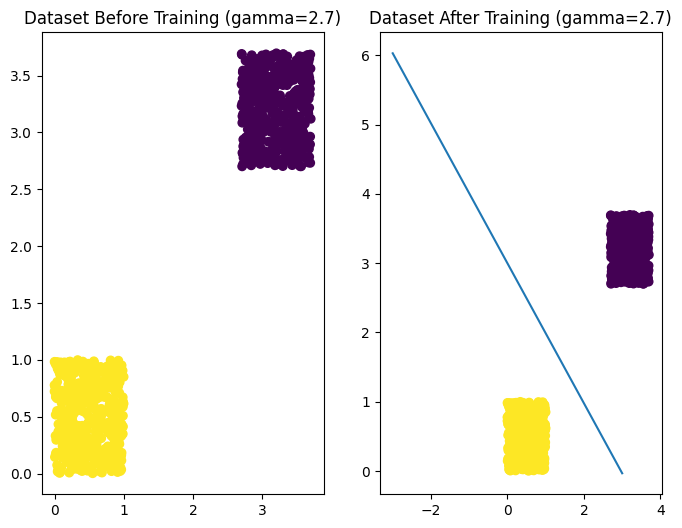

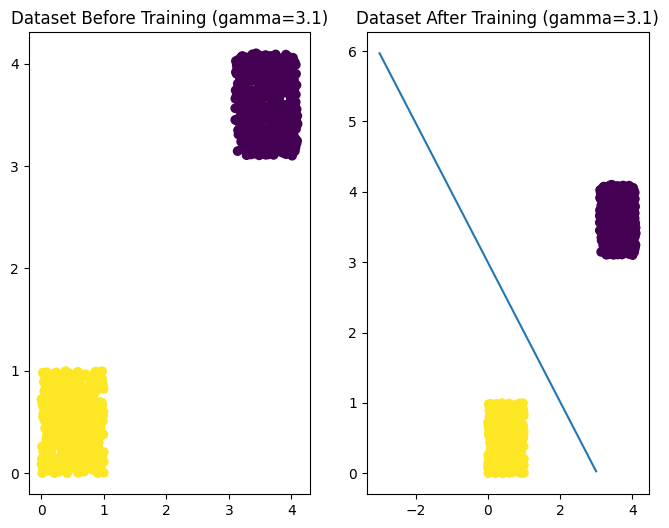

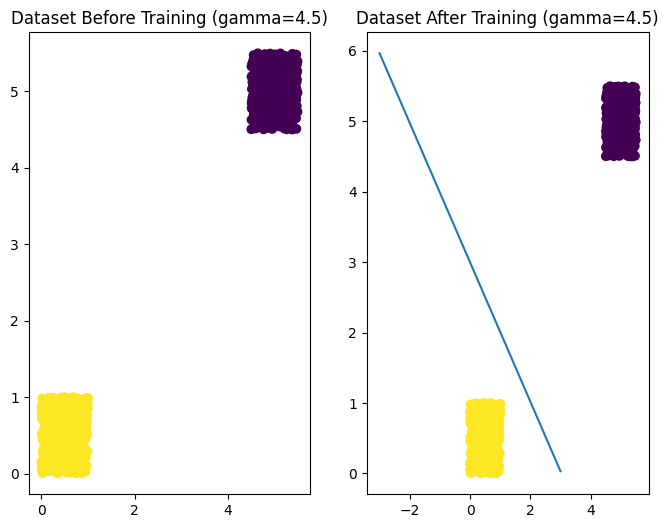

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_points, gamma):
    """
    Generates a linearly separable 2D dataset with two clusters.

    Args:
        num_points (int): Number of data points.
        gamma (float): Margin between the clusters.

    Returns:
        tuple: A tuple containing the features (X) and labels (y).
    """

    # Generate random points for each cluster
    X1 = np.random.rand(int(num_points / 2), 2)
    X2 = np.random.rand(int(num_points / 2), 2) + gamma

    # Add class labels
    y1 = np.ones(int(num_points / 2))
    y2 = -np.ones(int(num_points / 2))

    # Combine data from both clusters
    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2))

    # Shuffle the data
    indices = np.random.permutation(num_points)
    X = X[indices]
    y = y[indices]

    return X, y

def sigmoid(x):
    """Calculates the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(w, b, X, y):
    """Calculates the cross-entropy loss for a linear classifier."""
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

def gradient_cross_entropy_loss(w, b, X, y):
    """Calculates the gradients of the cross-entropy loss."""
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    dw = -np.mean(X.T * (y - predictions), axis=1)
    db = -np.mean(y - predictions)
    return dw, db

def gradient_descent(X, y, learning_rate=0.1, max_iterations=1000):
    """Trains a linear classifier using gradient descent."""
    w = np.zeros(X.shape[1])
    b = 0

    for _ in range(max_iterations):
        # Calculate gradients using cross-entropy loss
        dw, db = gradient_cross_entropy_loss(w, b, X, y)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

def plot_boundary(w, b, X, y):
    """
    Plots the decision boundary of the perceptron.

    Args:
        w (np.ndarray): Weights.
        b (float): Bias.
    """

    # Calculate line parameters
    m = -w[1] / w[0]
    c = (-b / w[0])+3

    # Plot the line
    x_values = np.linspace(-3, 3, 100)
    y_values = m * x_values + c
    plt.plot(x_values, y_values, label="Decision Boundary")

# Experiment with different gamma values
gamma_values = [0.5, 1.1, 2.7, 3.1, 4.5]

for gamma in gamma_values:
    # Generate data
    X, y = generate_data(1000, gamma)

    # Train linear classifier with gradient descent and cross-entropy loss
    w, b = gradient_descent(X, y)

    # Plot the dataset before and after training
    plt.figure(figsize=(8, 6))

    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Dataset Before Training (gamma={})".format(gamma))

    plt.subplot(122)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plot_boundary(w, b, X, y)
    plt.title("Dataset After Training (gamma={})".format(gamma))
    plt.show()

**Q3**

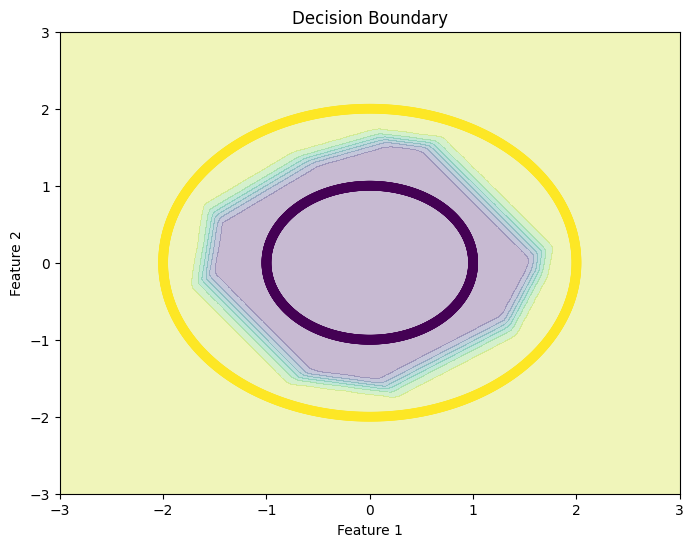

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset Generation
def generate_data(num_points, radius1, radius2):
    """
    Generates a dataset with points on two concentric circles.

    Args:
        num_points (int): Number of points to generate.
        radius1 (float): Radius of the inner circle.
        radius2 (float): Radius of the outer circle.

    Returns:
        tuple: A tuple containing the features (X) and labels (y).
    """

    # Generate angles for each point
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

    # Generate points for each circle
    circle1_x = radius1 * np.cos(angles)
    circle1_y = radius1 * np.sin(angles)
    circle2_x = radius2 * np.cos(angles)
    circle2_y = radius2 * np.sin(angles)

    # Combine points and assign labels
    X = np.vstack((np.hstack((circle1_x, circle2_x)), np.hstack((circle1_y, circle2_y)))).T
    y = np.hstack((np.zeros(num_points), np.ones(num_points)))

    # Shuffle the data
    indices = np.random.permutation(num_points * 2)
    X = X[indices]
    y = y[indices]

    return X, y

# 2. MLP Structure
def initialize_weights_and_biases(input_dim, hidden_dim, output_dim):
    """
    Initializes weights and biases for the MLP.
    """

    W1 = np.random.randn(hidden_dim, input_dim) * 0.1  # Hidden layer weights
    b1 = np.zeros((hidden_dim, 1))  # Hidden layer biases
    W2 = np.random.randn(output_dim, hidden_dim) * 0.1  # Output layer weights
    b2 = np.zeros((output_dim, 1))  # Output layer bias

    weights = {"W1": W1, "W2": W2}
    biases = {"b1": b1, "b2": b2}
    return weights, biases

def mlp(X, weights, biases):
    """
    Performs the forward pass through the MLP.
    """
    W1, W2 = weights["W1"], weights["W2"]
    b1, b2 = biases["b1"], biases["b2"]

    Z1 = np.dot(W1, X.T) + b1  # Hidden layer pre-activation
    A1 = np.maximum(0, Z1)  # ReLU activation
    Z2 = np.dot(W2, A1) + b2  # Output layer pre-activation
    output = 1 / (1 + np.exp(-Z2))  # Sigmoid activation

    return output, A1


# 3. Loss Calculation
def cross_entropy_loss(y_pred, y_true):
    """
    Calculates the cross-entropy loss for binary classification.
    """
    epsilon = 1e-15  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted values to avoid log(0)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)


# 4. Backpropagation
def backpropagation(X, y_true, weights, biases, output, A1):
    """
    Performs backpropagation to compute gradients.
    """
    m = X.shape[0]  # Number of data points

    # Output layer gradients
    dZ2 = output - y_true  # Derivative of cross-entropy loss w.r.t. output
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Hidden layer gradients
    dZ1 = np.dot(weights["W2"].T, dZ2) * np.where(A1 > 0, 1, 0)  # ReLU derivative
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}



# 5. Training Loop
def update_weights(weights, biases, gradients, learning_rate):
    """
    Updates weights and biases based on gradients and learning rate.
    """
    weights["W1"] -= learning_rate * gradients["dW1"]
    biases["b1"] -= learning_rate * gradients["db1"]
    weights["W2"] -= learning_rate * gradients["dW2"]
    biases["b2"] -= learning_rate * gradients["db2"]

def train_mlp(X, y, learning_rate, epochs):
    """
    Trains the Multi-Layer Perceptron (MLP) using gradient descent.

    Args:
        X: Input features (numpy array).
        y: Labels (numpy array).
        learning_rate: Learning rate hyperparameter.
        epochs: Number of training epochs.

    Returns:
        tuple: A tuple containing the trained weights and biases (`weights`, `biases`).
    """
    input_dim = X.shape[1]
    hidden_dim = 5  # Adjust number of hidden neurons
    output_dim = 1

    # Initialize weights and biases randomly
    weights, biases = initialize_weights_and_biases(input_dim, hidden_dim, output_dim)

    for epoch in range(epochs):
        for i in range(len(X)):
            x = X[i].reshape(1, -1)  # Reshape input for consistency
            y_true = y[i]

            # Forward pass
            output, A1 = mlp(x, weights, biases)

            # Backpropagation
            gradients = backpropagation(x, y_true, weights, biases, output, A1)

            # Weight update
            update_weights(weights, biases, gradients, learning_rate)

    return weights, biases



# 6. Visualization
def visualize_decision_boundary(X, y, weights, biases):
    """
    Visualizes the decision boundary learned by the MLP.

    Args:
        X: Input features (numpy array).
        y: True labels (numpy array).
        weights: Trained weights of the MLP.
        biases: Trained biases of the MLP.
    """

    # Create a meshgrid of points to evaluate the MLP on
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Flatten the meshgrid for input to the MLP
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for each point on the grid
    predictions, _ = mlp(grid, weights, biases)
    Z = predictions.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate dataset
    X, y = generate_data(1000, 1, 2)  # Adjust parameters as needed

    # Train the MLP
    trained_weights, trained_biases = train_mlp(X, y, learning_rate=0.01, epochs=100)  # Adjust learning rate and epochs

    # Visualize decision boundary
    visualize_decision_boundary(X, y, trained_weights, trained_biases)
